<a href="https://colab.research.google.com/github/manavgupta1261/Machine-Learning/blob/main/2348529_Lab4_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import pandas as pd
df = pd.read_csv('/content/Churn_Modelling.csv')
print(df.head())

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

In [33]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [34]:
df.drop(["RowNumber", "CustomerId", "Surname"], axis=1, inplace=True)

In [35]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [46]:
from sklearn.preprocessing import StandardScaler
y1 = df['Exited']
y2= df['Geography']
y3= df['Gender']
df1=df.drop('Exited', axis=1)
df2=df1.drop('Geography', axis=1)
df3=df2.drop('Gender', axis=1)
df3.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [47]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df3)
df_scaled = pd.DataFrame(X_scaled, columns=df3.columns)
df_scaled['Exited'] = y1
df_scaled['Geography'] = y2
df_scaled['Gender'] = y3
print(df_scaled.head())

   CreditScore       Age    Tenure   Balance  NumOfProducts  HasCrCard  \
0    -0.326221  0.293517 -1.041760 -1.225848      -0.911583   0.646092   
1    -0.440036  0.198164 -1.387538  0.117350      -0.911583  -1.547768   
2    -1.536794  0.293517  1.032908  1.333053       2.527057   0.646092   
3     0.501521  0.007457 -1.387538 -1.225848       0.807737  -1.547768   
4     2.063884  0.388871 -1.041760  0.785728      -0.911583   0.646092   

   IsActiveMember  EstimatedSalary  Exited Geography  Gender  
0        0.970243         0.021886       1    France  Female  
1        0.970243         0.216534       0     Spain  Female  
2       -1.030670         0.240687       1    France  Female  
3       -1.030670        -0.108918       0    France  Female  
4        0.970243        -0.365276       0     Spain  Female  


In [50]:
df_gender_encoded = pd.get_dummies(df_scaled['Gender'], prefix='Gender')
df_geography_encoded = pd.get_dummies(df_scaled['Geography'], prefix='Geography')
df_encoded = pd.concat([df_scaled, df_gender_encoded, df_geography_encoded], axis=1)
df_encoded.drop(['Gender', 'Geography'], axis=1, inplace=True)
print(df_encoded.head())

   CreditScore       Age    Tenure   Balance  NumOfProducts  HasCrCard  \
0    -0.326221  0.293517 -1.041760 -1.225848      -0.911583   0.646092   
1    -0.440036  0.198164 -1.387538  0.117350      -0.911583  -1.547768   
2    -1.536794  0.293517  1.032908  1.333053       2.527057   0.646092   
3     0.501521  0.007457 -1.387538 -1.225848       0.807737  -1.547768   
4     2.063884  0.388871 -1.041760  0.785728      -0.911583   0.646092   

   IsActiveMember  EstimatedSalary  Exited  Gender_Female  Gender_Male  \
0        0.970243         0.021886       1              1            0   
1        0.970243         0.216534       0              1            0   
2       -1.030670         0.240687       1              1            0   
3       -1.030670        -0.108918       0              1            0   
4        0.970243        -0.365276       0              1            0   

   Geography_France  Geography_Germany  Geography_Spain  
0                 1                  0              

In [51]:
from sklearn.model_selection import train_test_split
X1=df_encoded.drop(columns='Exited')
y2=df_encoded['Exited']
X_train, X_test, y_train, y_test = train_test_split(X1, y2, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (8000, 13)
X_test shape: (2000, 13)
y_train shape: (8000,)
y_test shape: (2000,)


In [59]:
from keras.layers import Dense, Dropout, Activation
from keras.models import Sequential
model = Sequential([
    Dense(input_dim=13,units=64, activation='relu'),
    Dense(units=16, activation='relu'),
    Dense(units=1, activation='sigmoid')
])
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mse'])
model.fit(X_train, y_train, epochs=100,
          batch_size=1000,
          validation_split=0.2)

Epoch 1/100
7/7 [==============================] - 1s 34ms/step - loss: 0.2739 - mse: 0.2739 - val_loss: 0.2484 - val_mse: 0.2484
Epoch 2/100
7/7 [==============================] - 0s 7ms/step - loss: 0.2366 - mse: 0.2366 - val_loss: 0.2184 - val_mse: 0.2184
Epoch 3/100
7/7 [==============================] - 0s 8ms/step - loss: 0.2112 - mse: 0.2112 - val_loss: 0.1974 - val_mse: 0.1974
Epoch 4/100
7/7 [==============================] - 0s 10ms/step - loss: 0.1927 - mse: 0.1927 - val_loss: 0.1813 - val_mse: 0.1813
Epoch 5/100
7/7 [==============================] - 0s 8ms/step - loss: 0.1788 - mse: 0.1788 - val_loss: 0.1692 - val_mse: 0.1692
Epoch 6/100
7/7 [==============================] - 0s 10ms/step - loss: 0.1685 - mse: 0.1685 - val_loss: 0.1605 - val_mse: 0.1605
Epoch 7/100
7/7 [==============================] - 0s 11ms/step - loss: 0.1613 - mse: 0.1613 - val_loss: 0.1544 - val_mse: 0.1544
Epoch 8/100
7/7 [==============================] - 0s 10ms/step - loss: 0.1562 - mse: 0.1562 

In [61]:
model1 = Sequential([
    Dense(input_dim=13,units=64, activation='relu'),
    Dropout(0.5),
    Dense(units=16, activation='relu'),
    Dropout(0.5),
    Dense(units=1, activation='sigmoid')
])
model1.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mse'])
model1.fit(X_train, y_train, epochs=100,
          batch_size=1000,
          validation_split=0.2)

Epoch 1/100
7/7 [==============================] - 1s 37ms/step - loss: 0.2470 - mse: 0.2470 - val_loss: 0.1923 - val_mse: 0.1923
Epoch 2/100
7/7 [==============================] - 0s 11ms/step - loss: 0.2139 - mse: 0.2139 - val_loss: 0.1709 - val_mse: 0.1709
Epoch 3/100
7/7 [==============================] - 0s 10ms/step - loss: 0.1940 - mse: 0.1940 - val_loss: 0.1595 - val_mse: 0.1595
Epoch 4/100
7/7 [==============================] - 0s 10ms/step - loss: 0.1836 - mse: 0.1836 - val_loss: 0.1534 - val_mse: 0.1534
Epoch 5/100
7/7 [==============================] - 0s 13ms/step - loss: 0.1762 - mse: 0.1762 - val_loss: 0.1502 - val_mse: 0.1502
Epoch 6/100
7/7 [==============================] - 0s 13ms/step - loss: 0.1732 - mse: 0.1732 - val_loss: 0.1482 - val_mse: 0.1482
Epoch 7/100
7/7 [==============================] - 0s 10ms/step - loss: 0.1691 - mse: 0.1691 - val_loss: 0.1469 - val_mse: 0.1469
Epoch 8/100
7/7 [==============================] - 0s 14ms/step - loss: 0.1655 - mse: 0.16

In [63]:
model2 = Sequential([
    Dense(input_dim=13,units=64, activation='relu'),
    Dropout(0.4),
    Dense(units=16, activation='relu'),
    Dropout(0.3),
    Dense(units=1, activation='sigmoid')
])
model2.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mse'])
model2.fit(X_train, y_train, epochs=100,
          batch_size=1000,
          validation_split=0.2)

Epoch 1/100
7/7 [==============================] - 1s 37ms/step - loss: 0.3208 - mse: 0.3208 - val_loss: 0.2563 - val_mse: 0.2563
Epoch 2/100
7/7 [==============================] - 0s 11ms/step - loss: 0.2586 - mse: 0.2586 - val_loss: 0.2066 - val_mse: 0.2066
Epoch 3/100
7/7 [==============================] - 0s 12ms/step - loss: 0.2168 - mse: 0.2168 - val_loss: 0.1781 - val_mse: 0.1781
Epoch 4/100
7/7 [==============================] - 0s 10ms/step - loss: 0.1918 - mse: 0.1918 - val_loss: 0.1625 - val_mse: 0.1625
Epoch 5/100
7/7 [==============================] - 0s 9ms/step - loss: 0.1792 - mse: 0.1792 - val_loss: 0.1545 - val_mse: 0.1545
Epoch 6/100
7/7 [==============================] - 0s 13ms/step - loss: 0.1720 - mse: 0.1720 - val_loss: 0.1501 - val_mse: 0.1501
Epoch 7/100
7/7 [==============================] - 0s 13ms/step - loss: 0.1650 - mse: 0.1650 - val_loss: 0.1475 - val_mse: 0.1475
Epoch 8/100
7/7 [==============================] - 0s 12ms/step - loss: 0.1625 - mse: 0.162

In [64]:
model3 = Sequential([
    Dense(input_dim=13,units=64, activation='relu'),
    Dropout(0.2),
    Dense(units=16, activation='relu'),
    Dropout(0.2),
    Dense(units=1, activation='sigmoid')
])
model3.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mse'])
for _ in range(100):
        model.fit(X_train, y_train, batch_size=1000, epochs=1, validation_split=0.2, verbose=0)
        model.reset_metrics()
import numpy as np
y_preds = np.stack([model3.predict(X_test) for _ in range(100)])
y_mean = np.mean(y_preds, axis=0)
y_std = np.std(y_preds, axis=0)

63/63 [==============================] - 0s 1ms/step


In [65]:
import numpy as np
Y_PREC = np.where(1 , model.predict(X_test) > 0.5, 0)
Y_PREC1 = np.where(1 , model1.predict(X_test) > 0.5, 0)
Y_PREC2 = np.where(1 , model2.predict(X_test) > 0.5, 0)
Y_PREC3 = np.where(1 , y_mean > 0.5, 0)

63/63 [==============================] - 0s 1ms/step


<BarContainer object of 4 artists>

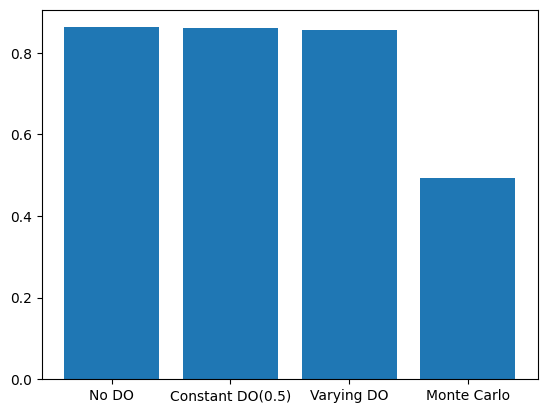

In [66]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
models=['No DO','Constant DO(0.5)','Varying DO','Monte Carlo']
acc=[accuracy_score(y_test,Y_PREC),accuracy_score(y_test,Y_PREC1),accuracy_score(y_test,Y_PREC2),accuracy_score(y_test,Y_PREC3)]
plt.bar(models,acc)

Text(0.5, 1.0, 'Receiver operating characteristic')

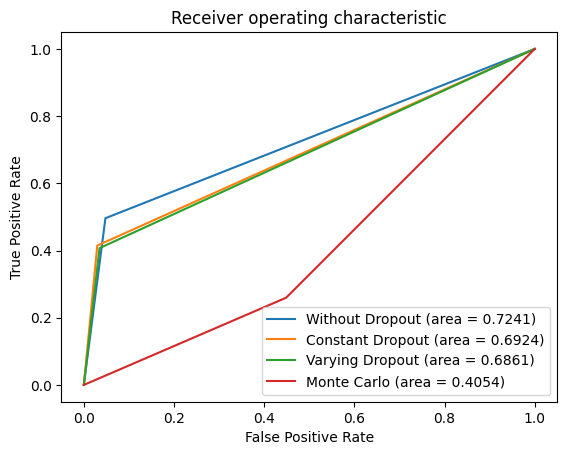

In [67]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
roc_auc=roc_auc_score(y_test,Y_PREC)
roc_auc1=roc_auc_score(y_test,Y_PREC1)
roc_auc2=roc_auc_score(y_test,Y_PREC2)
roc_auc3=roc_auc_score(y_test,Y_PREC3)
fpr, tpr,_= roc_curve(y_test,Y_PREC)
fpr1, tpr1,_= roc_curve(y_test,Y_PREC1)
fpr2, tpr2,_= roc_curve(y_test,Y_PREC2)
fpr3, tpr3,_= roc_curve(y_test,Y_PREC3)
plt.figure()
plt.plot(fpr, tpr,label='Without Dropout (area = %0.4f)' % roc_auc)
plt.plot(fpr1, tpr1, label='Constant Dropout (area = %0.4f)' % roc_auc1)
plt.plot(fpr2, tpr2, label='Varying Dropout (area = %0.4f)' % roc_auc2)
plt.plot(fpr3, tpr3, label='Monte Carlo (area = %0.4f)' % roc_auc3)
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
